In [1]:
import pandas as pd
from matplotlib import pyplot as plt

import gffpandas.gffpandas as gffpd

import pandas as pd
from pandas.core.common import SettingWithCopyWarning
# import gseapy as gp
import warnings

import numpy as np
from gseapy.plot import barplot, dotplot
from matplotlib import pyplot as plt 


warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

In [2]:
l = -np.log10(0.05)

def get_df(database, genelist, background):
    enr = gp.enrichr(gene_list=genelist ,
        gene_sets=database,
        background = background,  
        outdir=None,
        cutoff=0.5,                          
     )
    return enr

def plot(df, name):
    barplot(df,title= name, top_term=15, cutoff=0.05,color = 'r')
    plt.plot([l,l],[-1, 15], linestyle = '--',color='k', label = '- log10(0.05)')

In [12]:
from statsmodels.sandbox.stats.multicomp import multipletests

names = ['go_BP', 'go_MF', 'go_CC', 'go_reactome']
#proc = [go_BP, go_MF, go_CC, go_reactome]

for nim in range(4)[:1]:
    df = pd.read_csv(f'{path}data/stage4/permutations_n_terms_'+names[nim]+'_new.csv', low_memory=False)
    df_T = df[df.columns[6:]].T

    df = df.sort_values(by = 'Adjusted P-value')
    df['less'] = (df_T <= df_T.iloc[0]).sum(axis=0)
    df['p_val_perm'] = df['less']/70

    df[['p_val_perm','less','Gene_set', 'Overlap', 'P-value', 'Odds Ratio', 'Genes', 'Term',
           'Adjusted P-value', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11',
           '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23',
           '24', '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35',
           '36', '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47',
           '48', '49', '50', '51', '52', '53', '54', '55', '56', '57', '58', '59',
           '60', '61', '62', '63', '64', '65', '66', '67', '68', '69', '70',
           ]].to_csv(f'{path}data/stage4/permutations_n_terms_'+names[nim]+'_perm.csv', index = False)

    name = names[nim]
# plot(df[df['p_val_perm']<=0.05], name)

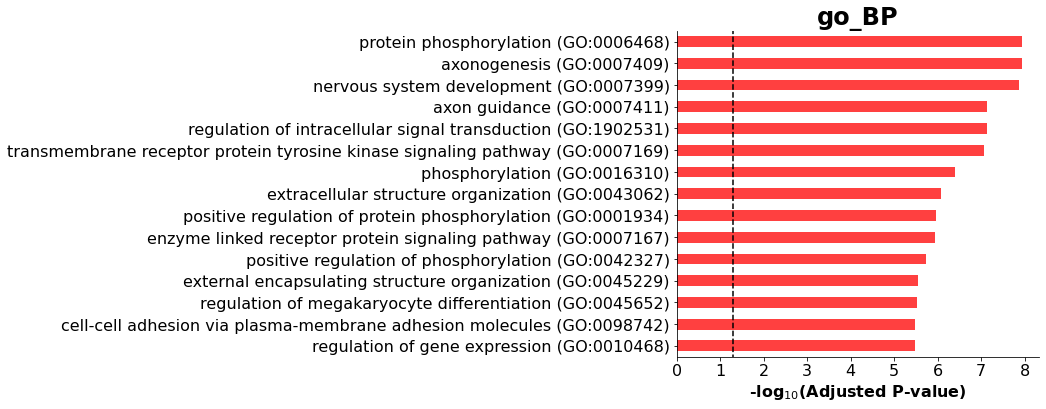

In [16]:
plot(df, name)

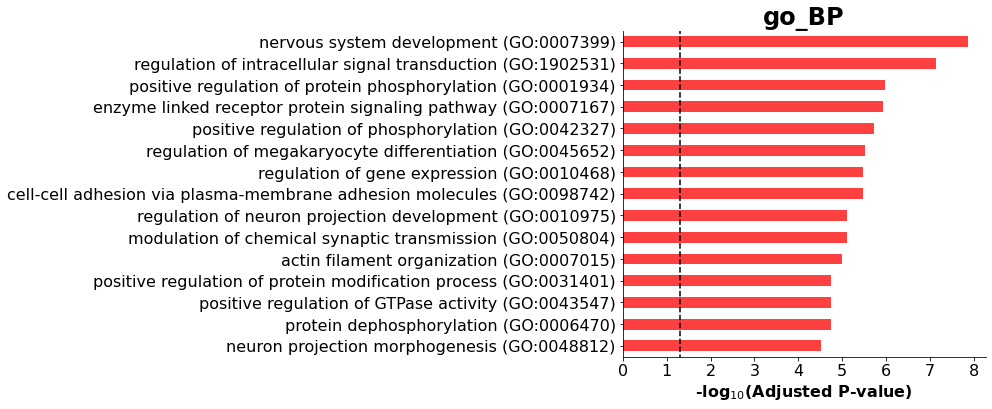

In [17]:
plot(df[df['p_val_perm']<=0.05], name)

In [63]:
df[df['better']==1]

,Gene_set,Overlap,P-value,Odds Ratio,Genes,Term,Adjusted P-value,2,3,4,...,63,64,65,66,67,68,69,70,better,p_val_perm
2,gs_ind_0,5/6,3.236891e-03,3.652345,NTRK1;NGF;NTRK2;ADCYAP1R1;ADORA2A,Activation of TRKA receptors Homo sapiens R-HS...,2.688678e-02,NaN,0.792432,0.122568,...,0.762806,0.297334,0.524300,0.348545,0.382846,0.634813,0.193274,0.028484,1,0.014286
4,gs_ind_0,14/18,1.479778e-06,3.387361,CDH15;CTNND1;CTNNA1;CDH18;CDH9;CDH2;CADM1;CDH1...,Adherens junctions interactions Homo sapiens R...,4.622698e-05,0.959934,0.369451,0.009206,...,0.810066,0.569750,0.952895,0.053075,0.975793,0.207558,0.915375,0.108634,1,0.014286
6,gs_ind_0,18/36,4.017236e-04,2.190431,PER2;HDAC3;ARNTL;NCOA2;NCOR1;TGS1;NR3C1;TBL1XR...,"BMAL1:CLOCK,NPAS2 activates circadian gene exp...",5.063832e-03,0.642354,0.044131,0.541323,...,0.208164,0.680049,0.702907,0.262763,0.652626,0.427309,0.653344,0.149640,1,0.014286
15,gs_ind_0,44/94,4.113087e-07,2.040247,ACTN4;RAC1;CTNND1;CTNNA1;CDH18;CDH9;GRB2;SRC;M...,Cell-Cell communication Homo sapiens R-HSA-150...,1.555396e-05,0.686306,0.024058,0.035108,...,0.488789,0.871589,0.903906,0.036569,0.933520,0.075645,0.232298,0.034959,1,0.014286
20,gs_ind_0,26/56,1.101289e-04,2.028352,NCOR1;CSNK1D;UBA52;CHD9;EP300;MEF2D;NCOA6;HDAC...,Circadian Clock Homo sapiens R-HSA-400253,1.666452e-03,0.543112,0.070827,0.247221,...,0.219168,0.611291,0.594133,0.397976,0.386031,0.365351,0.373088,0.101191,1,0.014286
22,gs_ind_0,16/32,8.379292e-04,2.193600,E2F4;PPP2R2A;CUL1;CDKN2C;CDK7;E2F3;UBA52;CDK6;...,Cyclin D associated events in G1 Homo sapiens ...,8.853708e-03,0.852716,0.163659,0.099802,...,0.436095,0.159723,0.586052,0.149834,0.262376,0.150773,0.268654,0.033965,1,0.014286
27,gs_ind_0,8/12,1.644030e-03,2.936106,TRIO;RAC1;CDC42;ABLIM3;SRC;WASL;PTK2;NTN1,DCC mediated attractive signaling Homo sapiens...,1.574981e-02,0.852716,0.520246,0.541323,...,0.430369,0.742447,0.524300,0.536432,0.714772,0.889919,0.232298,0.208726,1,0.014286
52,gs_ind_0,52/106,5.089964e-09,2.138081,KIF2C;DOCK5;KIF21A;RAC1;KIF4A;CDC42;CABLES2;GA...,Factors involved in megakaryocyte development ...,3.608987e-07,0.827682,0.041772,0.005068,...,0.024797,0.297334,0.045088,0.006033,0.004630,0.359248,0.012151,0.004699,1,0.014286
61,gs_ind_0,16/32,8.379292e-04,2.193600,E2F4;PPP2R2A;CUL1;CDKN2C;CDK7;E2F3;UBA52;CDK6;...,G1 Phase Homo sapiens R-HSA-69236,8.853708e-03,0.852716,0.163659,0.099802,...,0.436095,0.159723,0.586052,0.149834,0.262376,0.150773,0.268654,0.033965,1,0.014286
77,gs_ind_0,6/9,6.723194e-03,2.953512,RAC1;GPC1;CDC42;ARHGAP39;SRGAP1;SRGAP2,Inactivation of Cdc42 and Rac Homo sapiens R-H...,4.712795e-02,0.787066,0.128589,0.591031,...,0.270552,0.568835,0.748859,0.139879,0.683343,0.572136,0.389351,0.567721,1,0.014286


In [51]:
df['p_val_perm'] 

0     0.285714
1     0.142857
2     0.071429
3     0.142857
4     0.185714
        ...   
63    0.042857
64    0.057143
65    0.114286
66    0.071429
67    0.028571
Name: p_val_perm, Length: 68, dtype: float64

In [39]:
df_T.iloc[0]

,0,1,2,3,4,5,6,7,8,9,...,58,59,60,61,62,63,64,65,66,67
Adjusted P-value,0.018979,0.023820,1.701902e-09,0.000424,0.002536,1.010182e-02,0.023550,0.009752,0.023269,0.001286,...,0.001023,0.010211,0.009752,0.011125,0.019003,0.011125,0.000039,0.046891,0.001023,0.006338
2,0.598251,0.448606,1.057438e-02,0.028984,0.462101,9.089091e-01,0.908909,0.908909,0.744534,0.808362,...,0.783926,0.711240,0.617675,0.553339,0.646894,0.553339,0.761611,0.761611,0.908909,0.979654
3,0.004054,0.039378,1.620219e-07,0.000012,0.001122,1.051185e-02,0.248803,0.301270,0.113145,0.172849,...,0.083429,0.161983,0.223417,0.285047,0.311718,0.285047,0.000614,0.093746,0.169607,0.215280
4,0.006208,0.208692,1.201810e-01,0.294297,0.473984,7.465104e-06,0.001659,0.000787,0.073722,0.181672,...,0.000641,0.473984,0.351284,0.959056,0.351284,0.959056,0.003039,0.586982,0.051131,0.414798
5,0.004652,0.692379,6.570064e-04,0.032796,0.112392,2.793049e-02,0.150240,0.244244,0.059803,0.212308,...,0.391672,0.583080,0.033004,0.327268,0.100690,0.327268,0.178126,0.093335,0.027930,0.059803
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
66,0.000014,0.192158,2.607728e-11,0.000096,0.000523,6.160859e-02,0.028934,0.009376,0.001558,0.221642,...,0.038965,0.135465,0.000773,0.173181,0.004091,0.173181,0.025484,0.059550,0.037105,0.263047
67,0.055312,0.109263,7.966041e-04,0.188521,0.144509,7.451364e-08,0.178937,0.110205,0.110205,0.419280,...,0.014035,0.323256,0.415093,0.869055,0.537778,0.869055,0.124417,0.304000,0.112312,0.099217
68,0.008852,0.225823,2.929012e-03,0.027158,0.072189,4.937403e-03,0.180704,0.112527,0.155595,0.363159,...,0.250980,0.480948,0.142578,0.250980,0.214252,0.250980,0.011673,0.394333,0.554790,0.363159
69,0.132686,0.050213,1.124806e-02,0.058037,0.335042,1.758042e-05,0.360806,0.343712,0.204492,0.455262,...,0.045537,0.204492,0.045537,0.703452,0.120031,0.703452,0.541200,0.761503,0.556989,0.155775
